<a href="https://colab.research.google.com/github/dayudyah20/Belajar-Coursera/blob/main/Model_Jurnal_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERCOBAAN MODEL INJEKSI INSULIN YANG DI JURNAL (NILAI PARAMETER SESUAI JURNAL)**

GAMBAR SEHARUSNYA

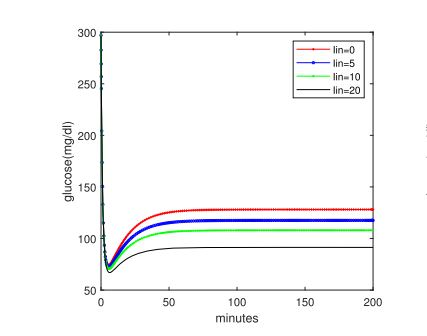

YANG DIGUNAKAN DALAM SKRIPSI

#Model Orang Normal (Tidak ada Injeksi Insulin dari luar)

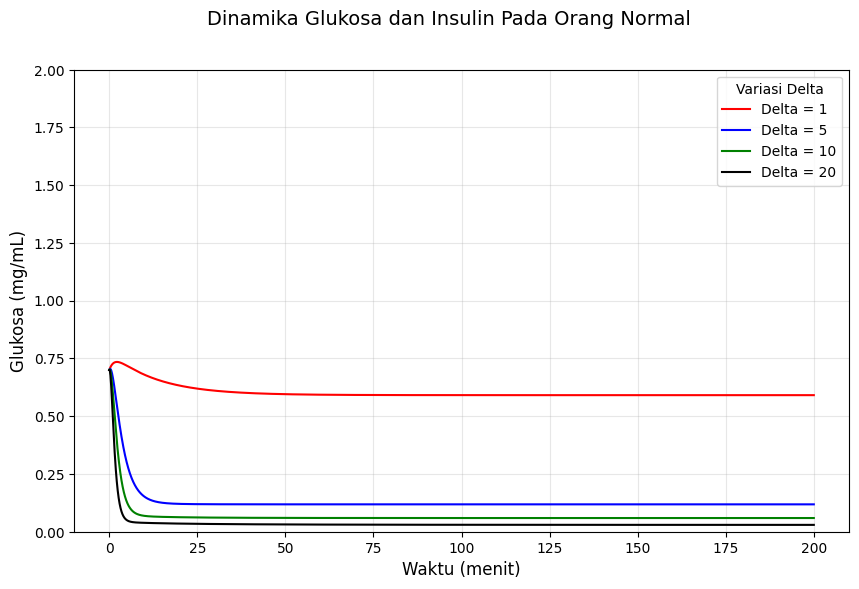

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

    #def f(z, t, alpha, gamma, theta, delta, beta):
    #G, I = z
    #dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    #dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    #return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075919
beta = 0.01

#alpha = 4.5    # Penerimaan glukosa
#gamma = 0.0002 # Penggunaan glukosa tanpa insulin
#theta = 0.00075919 # Pengaruh insulin pada glukosa
#delta = 0.2298 # Sekresi insulin dari glukosa
#beta = 1500  # Clearance insulin

# Rentang waktu simulasi
t = np.linspace(0, 200, 3000)

# Variasi delta yang ingin diuji
delta_list = [1, 5, 10, 20]
colors = ['red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [70.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

In [ ]:
# Menghitung titik kesetimbangan berdasarkan formula yang diberikan
G_eq = alpha * beta / (beta * gamma + delta * theta)
I_eq = delta / beta

# Menghitung nilai eigen berdasarkan formula yang diberikan
lambda_1 = (-(beta * gamma) - (theta * delta)) / beta
lambda_2 = -(alpha * beta**2) / (beta * gamma + delta * theta)

# Menampilkan titik kesetimbangan dan nilai eigen
print(f"Titik Kesetimbangan: G = {G_eq:.2f}, I = {I_eq:.2f}")
print(f"Nilai Eigen: \u03bb_1 = {lambda_1:.2f}, \u03bb_2 = {lambda_2:.2f}")


Titik Kesetimbangan: G = 2.96, I = 2000.00
Nilai Eigen: λ_1 = -1.52, λ_2 = -0.03


Model Injeksi Insulin

<ipython-input-11-2fd721bb513f>:7: RuntimeWarning: overflow encountered in scalar multiply
  dGdt = alpha - gamma * G - theta * G * I               # perubahan kadar glukosa (mg/dL/min)
<ipython-input-11-2fd721bb513f>:8: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = sigma * I / (1 + epsilon * I) - beta * I * G    # perubahan kadar insulin (μU/ml/min)
<ipython-input-11-2fd721bb513f>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dGdt = alpha - gamma * G - theta * G * I               # perubahan kadar glukosa (mg/dL/min)
<ipython-input-11-2fd721bb513f>:8: RuntimeWarning: invalid value encountered in scalar divide
  dIdt = sigma * I / (1 + epsilon * I) - beta * I * G    # perubahan kadar insulin (μU/ml/min)


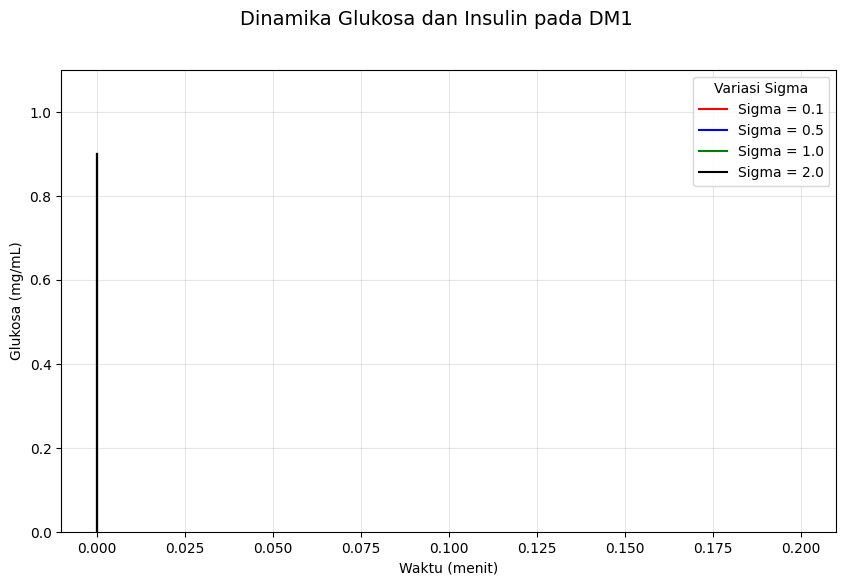

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definisi sistem persamaan glukosa dan insulin
def glucose_insulin_system(z, t, alpha, gamma, theta, sigma, beta, epsilon):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I               # perubahan kadar glukosa (mg/dL/min)
    dIdt = sigma * I / (1 + epsilon * I) - beta * I * G    # perubahan kadar insulin (μU/ml/min)
    return np.array([dGdt, dIdt])

# Metode Runge-Kutta orde 4 (h dinamis)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter tetap
alpha = 4.5
gamma = 0.0002
theta = 0.00075918
beta = 1500
epsilon = 2300

# Waktu simulasi
t = np.linspace(0, 300, 3000)

# Variasi sigma
sigma_list = [0.1, 0.5, 1.0, 2.0]
colors = ['red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, sigma in enumerate(sigma_list):
    z0 = [90.0, 3.0]  # Kondisi awal Glukosa dan Insulin
    params = (alpha, gamma, theta, sigma, beta, epsilon)
    solution = runge_kutta_4(glucose_insulin_system, z0, t, params)

    glucose = solution[:, 0] / 100  # Konversi mg/dL ke mg/mL
    ax1.plot(t, glucose, color=colors[i], label=f'Sigma = {sigma}', linestyle='-' if sigma != 0 else 'dotted')

ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Glukosa (mg/mL)', color='black')
ax1.set_ylim(0, max(glucose) + 0.2)
ax1.legend(loc="upper right", title="Variasi Sigma")
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin pada DM1', fontsize=14)
plt.show()

COBA GRAFIK BARU

<ipython-input-1-35cc4adb93a7>:7: RuntimeWarning: overflow encountered in scalar multiply
  dGdt = alpha - gamma * G - theta * G * I
<ipython-input-1-35cc4adb93a7>:8: RuntimeWarning: overflow encountered in scalar multiply
  dIdt = delta * G - beta * I * G
<ipython-input-1-35cc4adb93a7>:7: RuntimeWarning: invalid value encountered in scalar subtract
  dGdt = alpha - gamma * G - theta * G * I
<ipython-input-1-35cc4adb93a7>:8: RuntimeWarning: invalid value encountered in scalar multiply
  dIdt = delta * G - beta * I * G


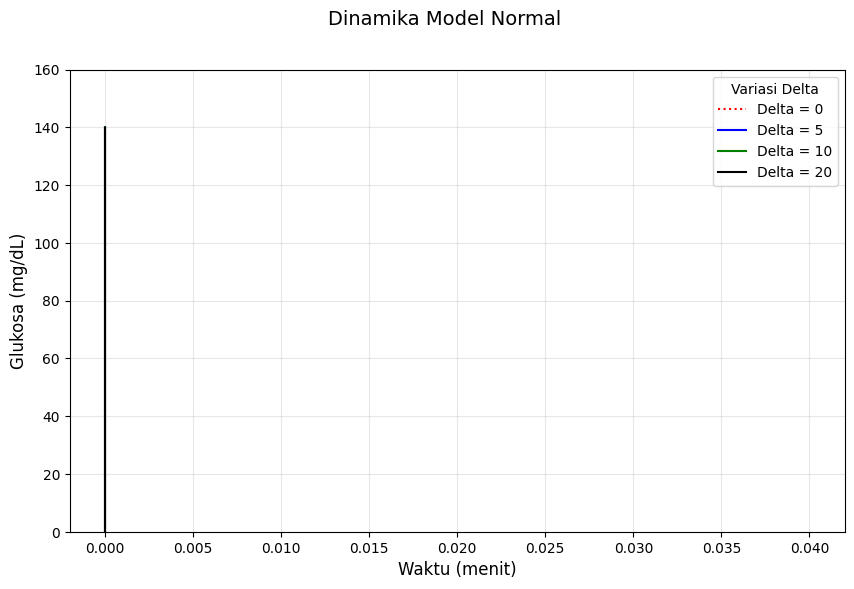

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I
    dIdt = delta * G - beta * I * G
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model
alpha = 2.3
gamma = 0.02
theta = 0.00003
beta = 1500

delta_list = [0, 5, 10, 20]
colors = ['red', 'blue', 'green', 'black']

# Waktu simulasi
t = np.linspace(0, 200, 10000)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Kondisi awal G = 140 mg/dL semua
z0 = [140.0, 5.0]

for i, delta in enumerate(delta_list):
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)
    glucose = solution[:, 0]  # Glukosa tetap dalam mg/dL
    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

# Plot setting
ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/dL)', color='black', fontsize=12)
ax1.set_ylim(0, 160)
ax1.set_yticks(np.arange(0, 170, 20))  # Mengatur jarak antar tick pada sumbu y
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)
fig.suptitle('Dinamika Model Normal', fontsize=14)

plt.show()

<ipython-input-6-2f1ab933e305>:6: RuntimeWarning: overflow encountered in scalar multiply
  dI_dt = c * G - d * G * I
<ipython-input-6-2f1ab933e305>:5: RuntimeWarning: invalid value encountered in scalar subtract
  dG_dt = Gin - a * G - b * G * I
<ipython-input-6-2f1ab933e305>:5: RuntimeWarning: overflow encountered in scalar multiply
  dG_dt = Gin - a * G - b * G * I


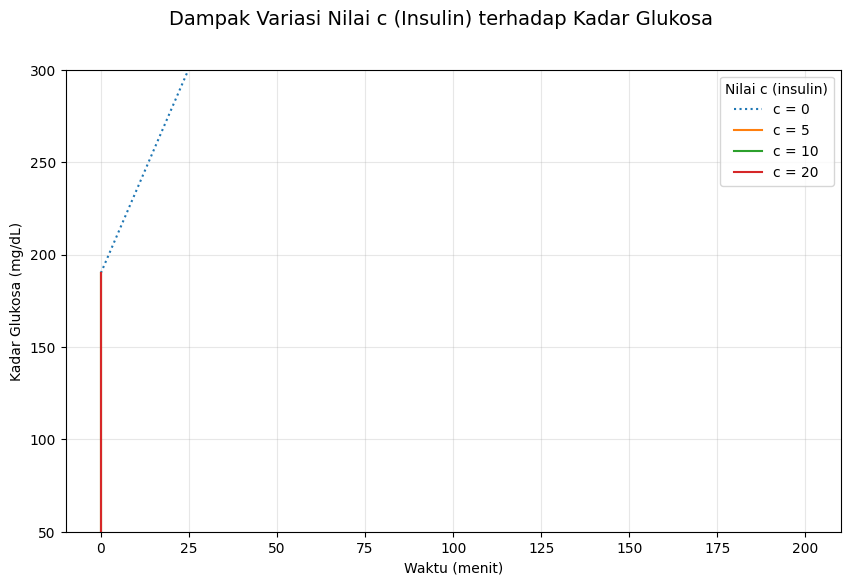

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def glucose_insulin_model(t, G, I, Gin, a, b, c, d):
    dG_dt = Gin - a * G - b * G * I
    dI_dt = c * G - d * G * I
    return dG_dt, dI_dt

def runge_kutta4(G0, I0, Gin, a, b, c, d, dt, T):
    n = int(T / dt)
    t_values = np.linspace(0, T, n)
    G_values = np.zeros(n)
    I_values = np.zeros(n)

    G_values[0] = G0
    I_values[0] = I0

    for i in range(1, n):
        t = t_values[i-1]
        G = G_values[i-1]
        I = I_values[i-1]

        k1_G, k1_I = glucose_insulin_model(t, G, I, Gin, a, b, c, d)
        k2_G, k2_I = glucose_insulin_model(t + dt/2, G + k1_G*dt/2, I + k1_I*dt/2, Gin, a, b, c, d)
        k3_G, k3_I = glucose_insulin_model(t + dt/2, G + k2_G*dt/2, I + k2_I*dt/2, Gin, a, b, c, d)
        k4_G, k4_I = glucose_insulin_model(t + dt, G + k3_G*dt, I + k3_I*dt, Gin, a, b, c, d)

        G_values[i] = G + (dt/6) * (k1_G + 2*k2_G + 2*k3_G + k4_G)
        I_values[i] = I + (dt/6) * (k1_I + 2*k2_I + 2*k3_I + k4_I)

    return t_values, G_values, I_values

# Parameters
Gin = 4.5
a = 0.0002
b = 0.00075919
d = 1500
G0 = 297
I0 = 5
c_values = [0, 5, 10, 20]  # Variasi nilai c yang mewakili level insulin

# Simulation settings
dt = 1  # menit
T = 200  # total waktu simulasi (menit)

# Plotting grafik kadar glukosa untuk berbagai nilai c
fig, ax1 = plt.subplots(figsize=(10, 6))

for i, c_value in enumerate(c_values):
    z0 = [190.0, 0]  # Nilai awal: glukosa = 190 mg/dL, insulin = 0
    t, glucose_values, _ = runge_kutta4(z0[0], z0[1], Gin, a, b, c_value, d, dt, T)
    ax1.plot(t, glucose_values, label=f'c = {c_value}', linestyle='dotted' if c_value == 0 else '-')

ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Kadar Glukosa (mg/dL)', color='black')
ax1.set_ylim(50, 300)
ax1.legend(loc="upper right", title="Nilai c (insulin)")
ax1.grid(alpha=0.3)

fig.suptitle('Dampak Variasi Nilai c (Insulin) terhadap Kadar Glukosa', fontsize=14)
plt.show()

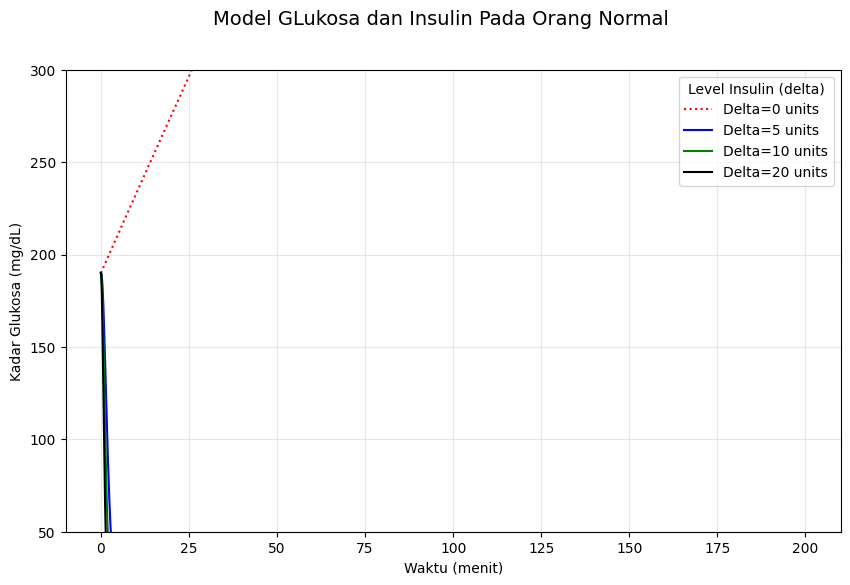

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk model glukosa dan insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # perubahan kadar glukosa (mg/dL/min)
    dIdt = delta * G - beta * I * G  # insulin dipengaruhi oleh injeksi insulin
    return np.array([dGdt, dIdt])

# Parameter-parameter model
alpha = 4.5
gamma = 0.001  # Memperlambat penurunan glukosa (lebih kecil agar glukosa naik)
theta = 0.0005  # Penurunan glukosa lebih kecil
beta = 0.0003
t = np.linspace(0, 200, 3000)

# Nilai delta untuk level insulin yang berbeda
delta_values = [0, 5, 10, 20]  # Nilai delta (level insulin)
colors = ['red', 'blue', 'green', 'black']

# Fungsi untuk menyelesaikan persamaan diferensial menggunakan metode Runge-Kutta
def runge_kutta_4(f, z0, t, params):
    dt = t[1] - t[0]
    result = np.zeros((len(t), len(z0)))
    result[0] = z0
    for i in range(1, len(t)):
        k1 = f(result[i-1], t[i-1], *params)
        k2 = f(result[i-1] + 0.5 * dt * k1, t[i-1] + 0.5 * dt, *params)
        k3 = f(result[i-1] + 0.5 * dt * k2, t[i-1] + 0.5 * dt, *params)
        k4 = f(result[i-1] + dt * k3, t[i-1] + dt, *params)
        result[i] = result[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return result

# Plotting grafik
fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta_value in enumerate(delta_values):
    z0 = [190.0, 0]  # Nilai awal: kadar glukosa = 190 mg/dL, level insulin awal = 0
    params = (alpha, gamma, theta, delta_value, beta)
    solution = runge_kutta_4(f, z0, t, params)
    glucose_converted = solution[:, 0]  # Mengambil kadar glukosa dari solusi
    ax1.plot(t, glucose_converted, color=colors[i], label=f'Delta={delta_value} units', linestyle='dotted' if delta_value == 0 else '-')

ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Kadar Glukosa (mg/dL)', color='black')
ax1.set_ylim(50, 300)  # Menyesuaikan batas atas agar kadar glukosa tidak terlalu tinggi
ax1.legend(loc="upper right", title="Level Insulin (delta)")
ax1.grid(alpha=0.3)

fig.suptitle('Model GLukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


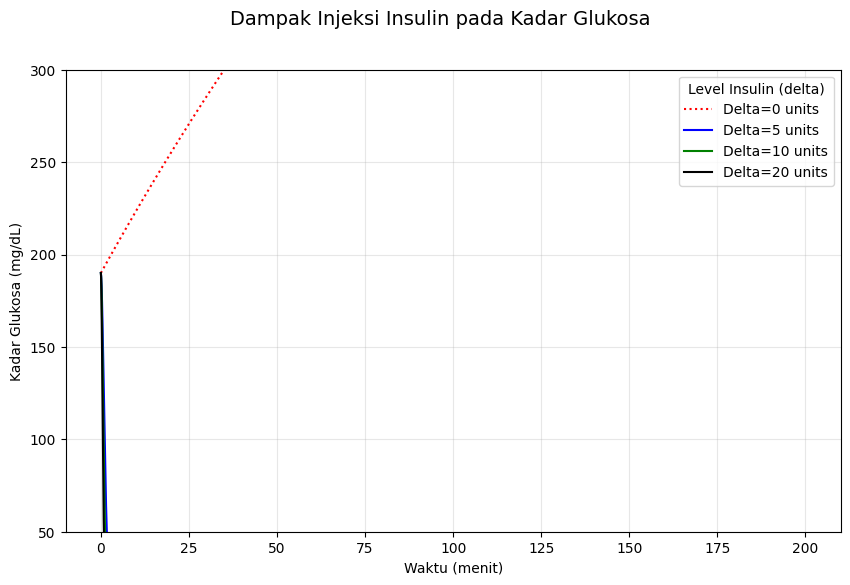

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk model glukosa dan insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I  # perubahan kadar glukosa (mg/dL/min)
    dIdt = delta * G - beta * I * G  # insulin dipengaruhi oleh injeksi insulin
    return np.array([dGdt, dIdt])

# Parameter-parameter model
alpha = 4.5
gamma = 0.0055  # Penurunan glukosa lebih lambat
theta = 0.0012  # Pengaruh interaksi glukosa dan insulin yang lebih kecil
beta = 0.0003
t = np.linspace(0, 200, 3000)

# Nilai delta untuk level insulin yang berbeda
delta_values = [0, 5, 10, 20]  # Nilai delta (level insulin)
colors = ['red', 'blue', 'green', 'black']

# Fungsi untuk menyelesaikan persamaan diferensial menggunakan metode Runge-Kutta
def runge_kutta_4(f, z0, t, params):
    dt = t[1] - t[0]
    result = np.zeros((len(t), len(z0)))
    result[0] = z0
    for i in range(1, len(t)):
        k1 = f(result[i-1], t[i-1], *params)
        k2 = f(result[i-1] + 0.5 * dt * k1, t[i-1] + 0.5 * dt, *params)
        k3 = f(result[i-1] + 0.5 * dt * k2, t[i-1] + 0.5 * dt, *params)
        k4 = f(result[i-1] + dt * k3, t[i-1] + dt, *params)
        result[i] = result[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return result

# Plotting grafik
fig, ax1 = plt.subplots(figsize=(10, 6))

# Menyelesaikan model untuk setiap level delta
for i, delta_value in enumerate(delta_values):
    z0 = [190.0, 0]  # Nilai awal: kadar glukosa = 190 mg/dL, level insulin awal = 0

    # Menyesuaikan gamma secara langsung pada delta yang lebih besar untuk mempercepat penurunan glukosa
    if delta_value > 0:
        gamma = 0.1  # Meningkatkan gamma untuk mempercepat penurunan glukosa

    params = (alpha, gamma, theta, delta_value, beta)
    solution = runge_kutta_4(f, z0, t, params)
    glucose_converted = solution[:, 0]  # Mengambil kadar glukosa dari solusi
    ax1.plot(t, glucose_converted, color=colors[i], label=f'Delta={delta_value} units', linestyle='dotted' if delta_value == 0 else '-')

ax1.set_xlabel('Waktu (menit)')
ax1.set_ylabel('Kadar Glukosa (mg/dL)', color='black')
ax1.set_ylim(50, 300)  # Menyesuaikan batas atas agar kadar glukosa tidak terlalu tinggi
ax1.legend(loc="upper right", title="Level Insulin (delta)")
ax1.grid(alpha=0.3)

fig.suptitle('Dampak Injeksi Insulin pada Kadar Glukosa', fontsize=14)
plt.show()


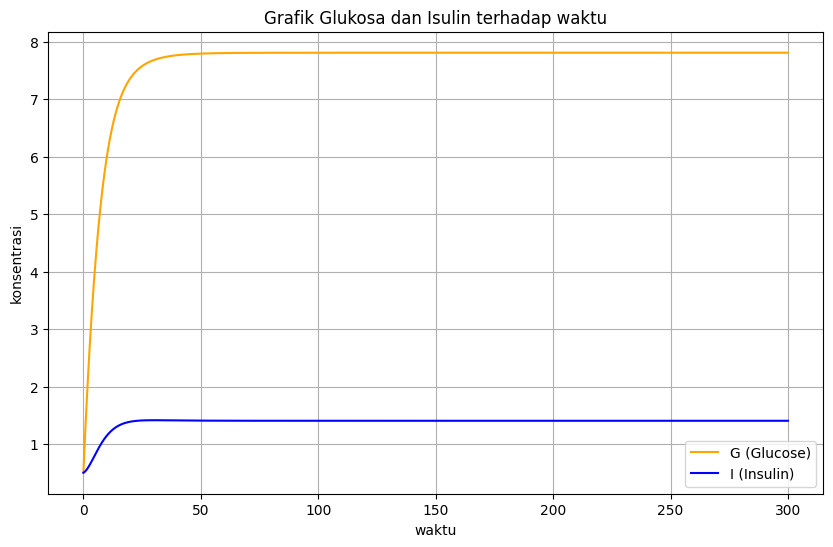

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
alpha = 1.0
gamma = 0.1
theta = 0.02
delta = 0.05
beta = 0.02
alpha_insulin = 0.1 # Sensitivitas produksi insulin terhadapa glukosa


def sistem(t, y):
    G, I = y
    dG_dt = alpha - gamma * G - theta * G * I
    dI_dt = (delta * G) / (1 + alpha_insulin * G) - beta * G * I
    return np.array([dG_dt, dI_dt])


def runge_kutta_4(f, t0, y0, t_end, h):
    n_steps = int((t_end - t0) / h)
    t_values = np.linspace(t0, t_end, n_steps + 1)
    y_values = np.zeros((n_steps + 1, len(y0)))
    y_values[0] = y0

    for i in range(n_steps):
        t = t_values[i]
        y = y_values[i]
        k1 = f(t, y)
        k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
        k3 = f(t + 0.5 * h, y + 0.5 * h * k2)
        k4 = f(t + h, y + h * k3)
        y_values[i + 1] = y + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return t_values, y_values

t0 = 0
y0 = [0.5, 0.5]  # nilai awl
t_end = 300 #menit
h = 0.1


t_values, y_values = runge_kutta_4(sistem, t0, y0, t_end, h)

plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values[:, 0], label="G (Glucose)", color='orange')
plt.plot(t_values, y_values[:, 1], label="I (Insulin)", color='blue')
plt.title('Grafik Glukosa dan Isulin terhadap waktu')
plt.xlabel('waktu')
plt.ylabel('konsentrasi')
plt.legend()
plt.grid(True)
plt.show()


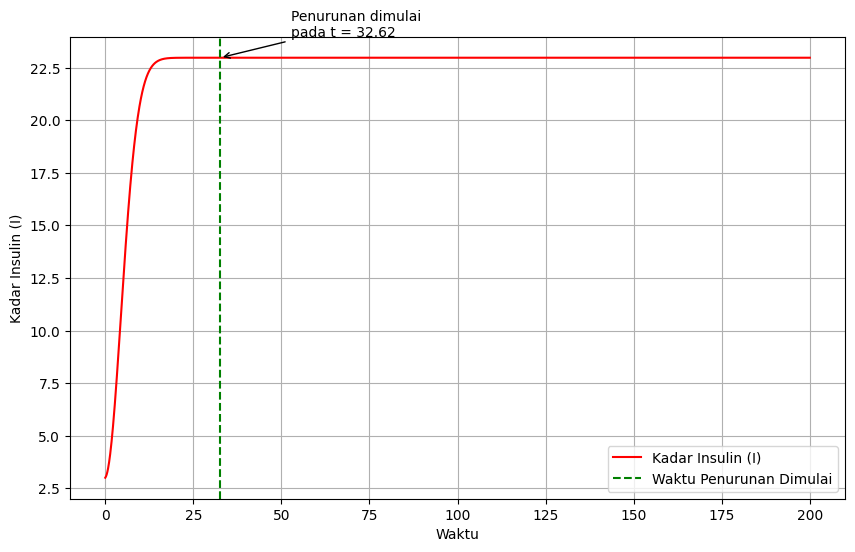

          Waktu  Kadar Glukosa (G)  Kadar Insulin (I)
0       0.00000           1.000000           3.000000
1       0.10005           1.449920           3.024472
2       0.20010           1.899725           3.057883
3       0.30015           2.349411           3.100185
4       0.40020           2.798973           3.151320
...         ...                ...                ...
1995  199.59980         247.559981          22.980000
1996  199.69985         247.573127          22.980000
1997  199.79990         247.586250          22.980000
1998  199.89995         247.599350          22.980000
1999  200.00000         247.612427          22.980000

[2000 rows x 3 columns]
Penurunan insulin dimulai pada waktu t = 32.62


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameter Sistem
alpha_new = 4.5     # Penerimaan glukosa
gamma_new = 0.0002  # Penggunaan glukosa tanpa insulin
theta_new = 0.00075919  # Pengaruh insulin pada glukosa
delta_new = 0.2298  # Sekresi insulin dari glukosa
beta_new = 0.01     # Clearance insulin

# Model persamaan diferensial
def model(y, t, alpha, gamma, theta, delta, beta):
    G, I = y
    dGdt = alpha - gamma * G - theta * G * I  # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G          # perubahan kadar insulin
    return [dGdt, dIdt]

# Kondisi awal
G0_new = 1.0  # Kadar glukosa awal
I0_new = 3.0  # Kadar insulin awal

# Rentang waktu simulasi
t_extended = np.linspace(0, 200, 2000)

# Menyelesaikan sistem persamaan diferensial dengan parameter baru dan rentang waktu yang diperpanjang
solution_extended = odeint(model, [G0_new, I0_new], t_extended, args=(alpha_new, gamma_new, theta_new, delta_new, beta_new))

# Menyimpan hasil untuk G dan I
G_extended = solution_extended[:, 0]
I_extended = solution_extended[:, 1]
dIdt_extended = delta_new * G_extended - beta_new * I_extended * G_extended  # Laju perubahan insulin

# Mencari kapan dI/dt menjadi negatif (penurunan insulin)
time_when_decreases_extended = t_extended[np.argmax(dIdt_extended < 0)] if np.any(dIdt_extended < 0) else None



# Menampilkan grafik perubahan insulin dengan rentang waktu yang lebih panjang
plt.figure(figsize=(10, 6))
plt.plot(t_extended, I_extended, label="Kadar Insulin (I)", color='red')

# Menambahkan garis vertikal pada waktu penurunan insulin pertama kali dimulai
if time_when_decreases_extended is not None:


    plt.axvline(x=time_when_decreases_extended, color='green', linestyle='--', label="Waktu Penurunan Dimulai")
    # Menambahkan anotasi untuk menunjukkan penurunan insulin
    plt.annotate(f'Penurunan dimulai\npada t = {time_when_decreases_extended:.2f}',
                 xy=(time_when_decreases_extended, I_extended[np.argmax(dIdt_extended < 0)]),
                 xytext=(time_when_decreases_extended + 20, I_extended[np.argmax(dIdt_extended < 0)] + 1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

plt.xlabel("Waktu")
plt.ylabel("Kadar Insulin (I)")
#plt.title("Perubahan Kadar Insulin (I) Seiring Waktu (Beta = 0.01) dengan Penurunan yang Diperjelas")
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan solusi untuk G dan I dalam bentuk DataFrame
solution_df = pd.DataFrame({
    'Waktu': t_extended,
    'Kadar Glukosa (G)': G_extended,
    'Kadar Insulin (I)': I_extended
})

# Menampilkan solusi dalam tabel
print(solution_df)  # Menampilkan 5 baris pertama dari solusi

# Menampilkan waktu dimana penurunan insulin dimulai jika ada
print(f"Penurunan insulin dimulai pada waktu t = {time_when_decreases_extended:.2f}")

#Model Orang Normal (percobaan parameter)

## Variasi Alpha

##VERSI 1

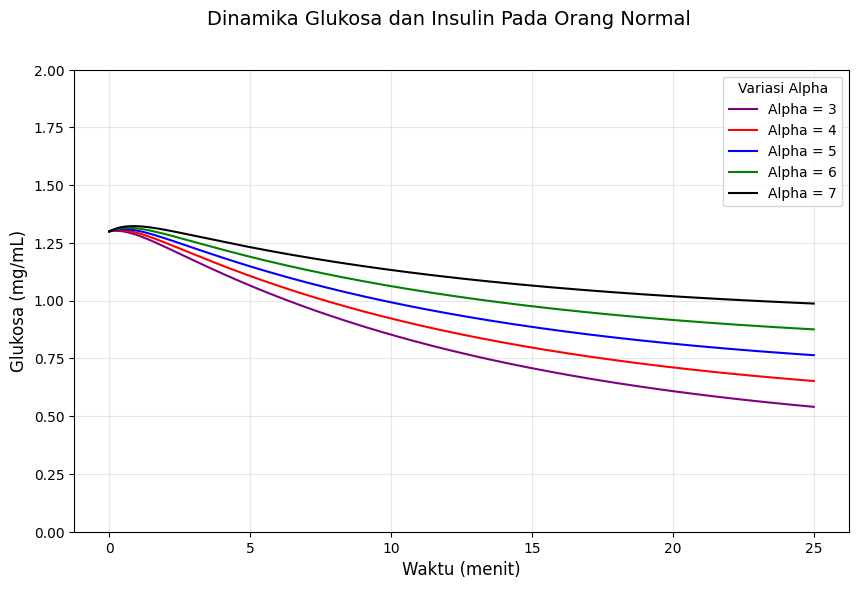

In [66]:
#1
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

    #def f(z, t, alpha, gamma, theta, delta, beta):
    #G, I = z
    #dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    #dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    #return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
gamma = 0.0002
theta = 0.00075919
beta = 0.01
delta = 1

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi alpha yang ingin diuji
alpha_list = [3, 4, 5, 6, 7] # dibawah 0 seperti 0.01, 0.001 itu perubahannya sedikit jadi bisa dieliminasi
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, alpha in enumerate(alpha_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Alpha = {alpha}',
             linestyle='dotted' if alpha == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Alpha", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

##VERSI 2

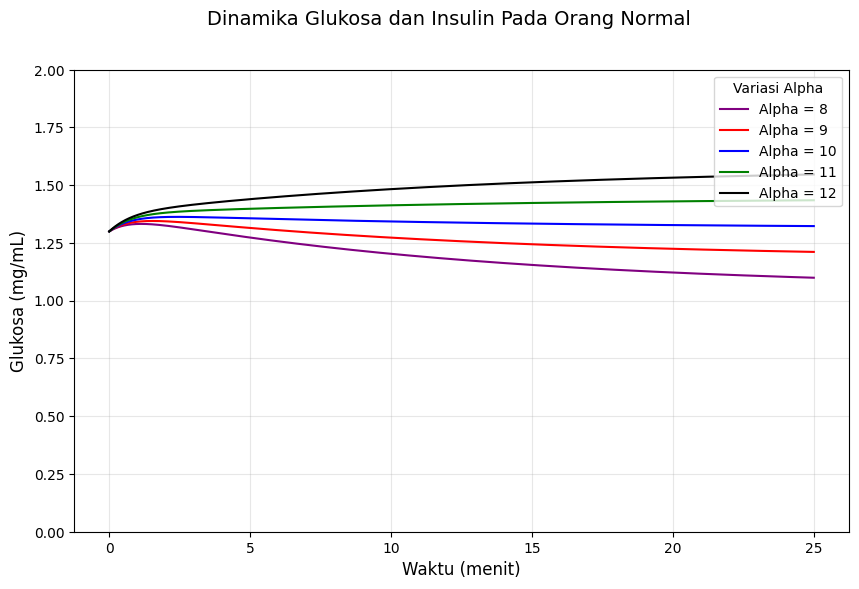

In [183]:
#2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

    #def f(z, t, alpha, gamma, theta, delta, beta):
    #G, I = z
    #dGdt = alpha - gamma * G - theta * G * I  # Penurunan glukosa perlahan
    #dIdt = delta * G - beta * I * G           # Insulin naik sebagai respons glukosa
    #return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
gamma = 0.0002
theta = 0.00075919
beta = 0.01
delta = 1

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi alpha yang ingin diuji
alpha_list = [8, 9, 10, 11, 12] # dibawah 0 seperti 0.01, 0.001 itu perubahannya sedikit jadi bisa dieliminasi
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, alpha in enumerate(alpha_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Alpha = {alpha}',
             linestyle='dotted' if alpha == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Alpha", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()

## Variasi Delta

## VERSI 1

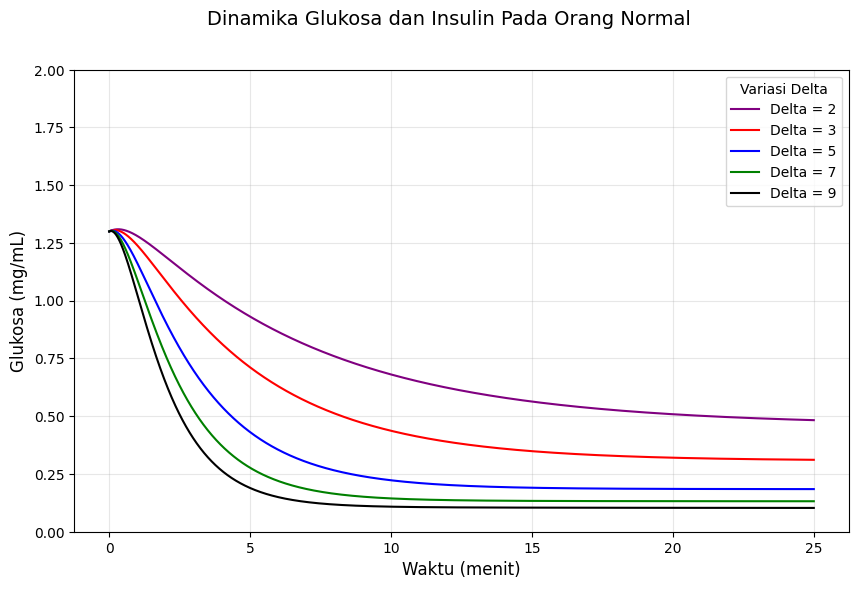

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 7
gamma = 0.0002
theta = 0.00075919
beta = 0.01

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi delta yang ingin diuji
delta_list = [2, 3, 5, 7, 9]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


##VERSI 2

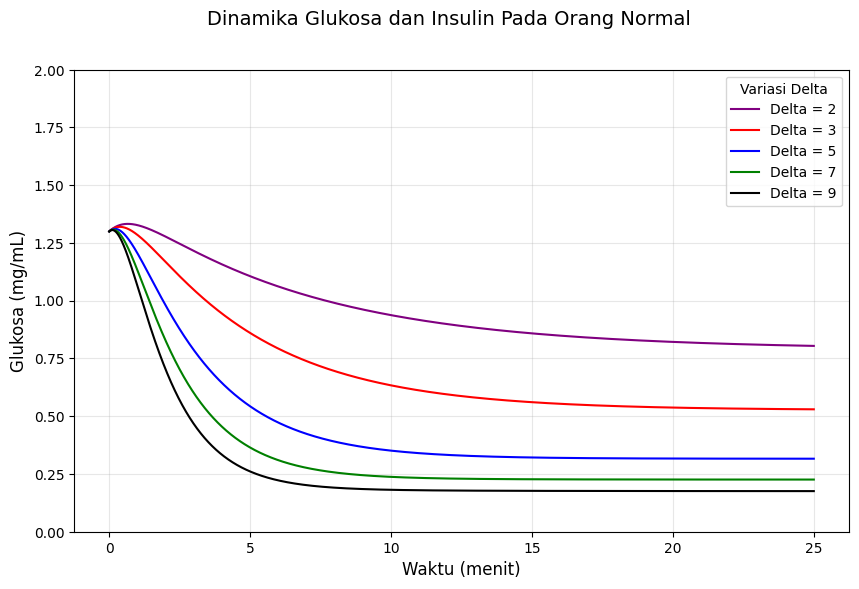

In [184]:
#2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 12
gamma = 0.0002
theta = 0.00075919
beta = 0.01

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi delta yang ingin diuji
delta_list = [2, 3, 5, 7, 9]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


# Variasi Gamma

##VERSI 1

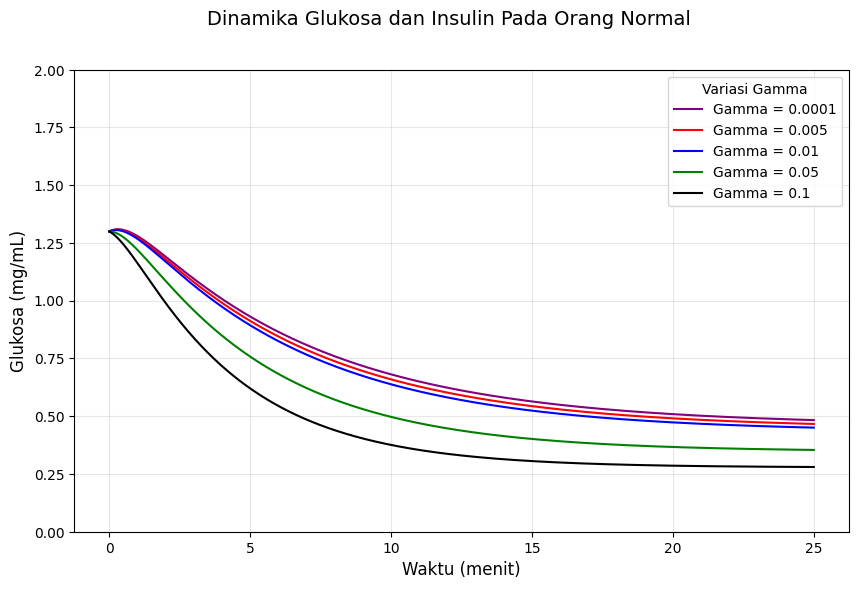

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 7
theta = 0.00075919
beta = 0.01
delta = 2

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi yang ingin diuji
gamma_list = [0.0001, 0.005, 0.01, 0.05, 0.1] #0.0002
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, gamma in enumerate(gamma_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Gamma = {gamma}',
             linestyle='dotted' if gamma == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Gamma", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


##VERSI 2

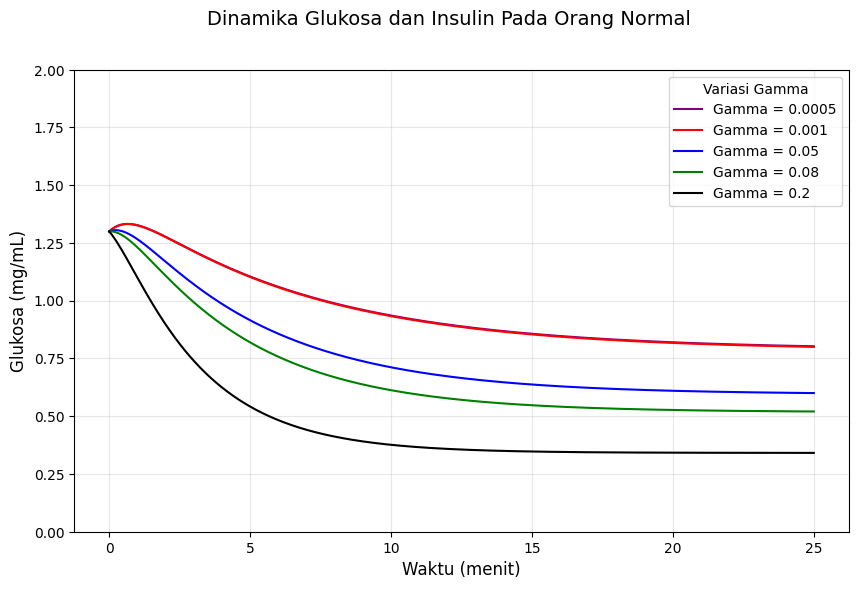

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 12
theta = 0.00075919
beta = 0.01
delta = 2

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi yang ingin diuji
gamma_list = [0.0005, 0.001, 0.05, 0.08, 0.2] #0.0002
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, gamma in enumerate(gamma_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Gamma = {gamma}',
             linestyle='dotted' if gamma == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Gamma", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


# Variasi Beta

##VERSI 1

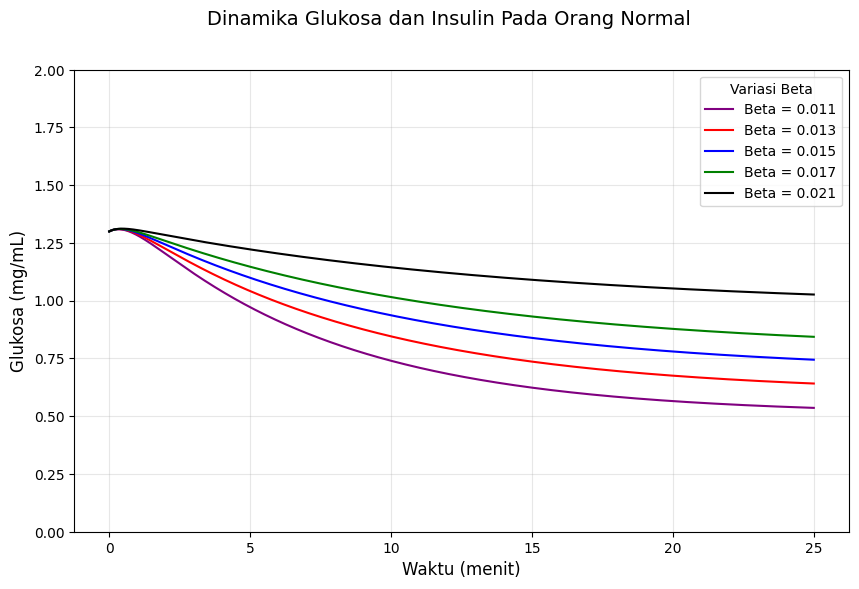

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 7
theta = 0.00075919
gamma = 0.0001
delta = 2

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi yang ingin diuji
beta_list = [0.011, 0.013, 0.015, 0.017, 0.021] #0.01
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, beta in enumerate(beta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Beta = {beta}',
             linestyle='dotted' if beta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Beta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


##VERSI 2

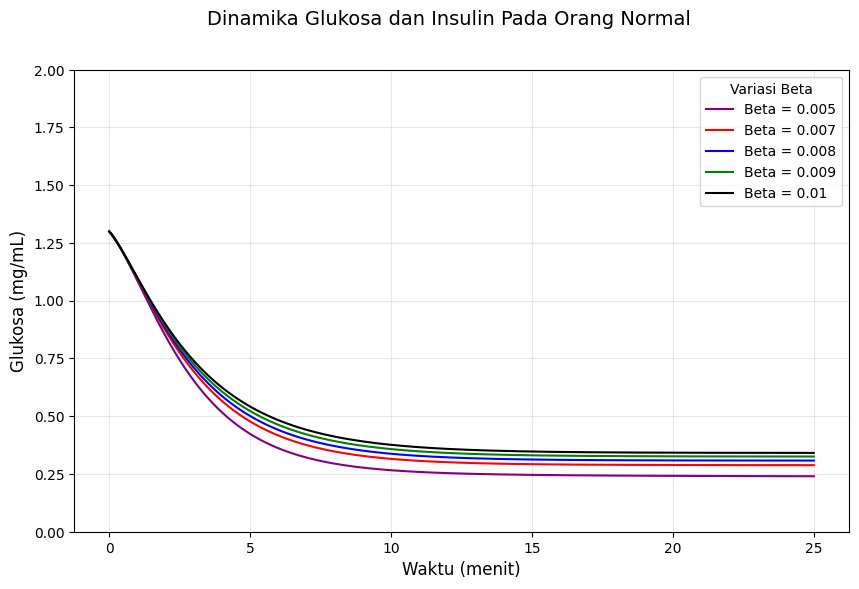

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 12
theta = 0.00075919
gamma = 0.2
delta = 2

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi yang ingin diuji
beta_list = [0.005, 0.007, 0.008, 0.009, 0.01] #0.01
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, beta in enumerate(beta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Beta = {beta}',
             linestyle='dotted' if beta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Beta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


# Variasi Theta

##VERSI 1

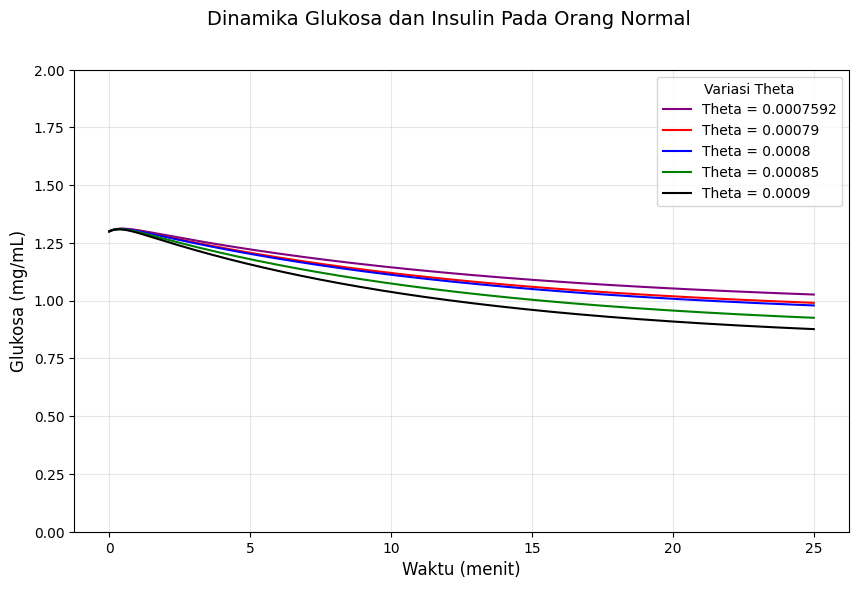

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 7
gamma = 0.0001
beta = 0.021
delta = 2

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi yang ingin diuji
theta_list = [0.0007592, 0.00079, 0.0008, 0.00085, 0.0009] #0.00075919
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, theta in enumerate(theta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Theta = {theta}',
             linestyle='dotted' if theta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Theta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


##VERSI 2

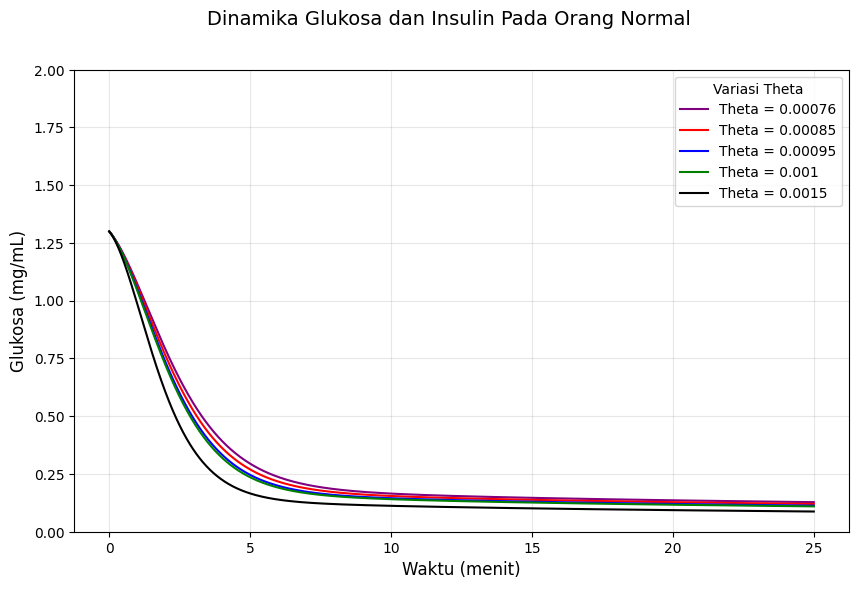

In [187]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 12
gamma = 0.2
beta = 0.001
delta = 2

# Rentang waktu simulasi
t = np.linspace(0, 25, 3000)

# Variasi yang ingin diuji
theta_list = [0.00076, 0.00085, 0.00095, 0.001, 0.0015] #0.00075919
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, theta in enumerate(theta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Theta = {theta}',
             linestyle='dotted' if theta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Theta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


# Model Normal dengan Semua Parameter

## alpha = 7, gamma = 0.1, theta = 0.00009, beta = 0.021

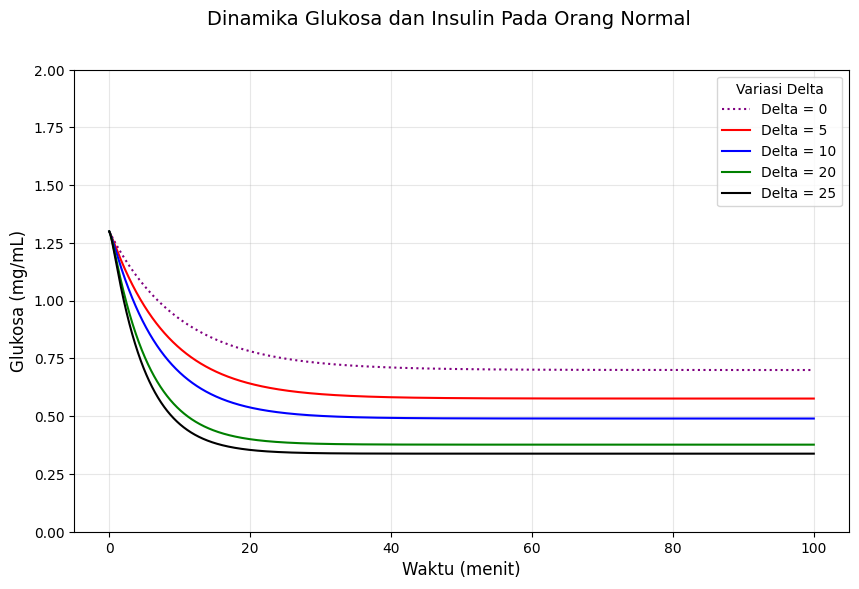

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 7
gamma = 0.1
theta = 0.00009
beta = 0.021

# Rentang waktu simulasi
t = np.linspace(0, 100, 3000)

# Variasi delta yang ingin diuji
delta_list = [0, 5, 10 , 20, 25]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()


## alpha = 12, gamma = 0.2, theta = 0.0015, beta = 0.01

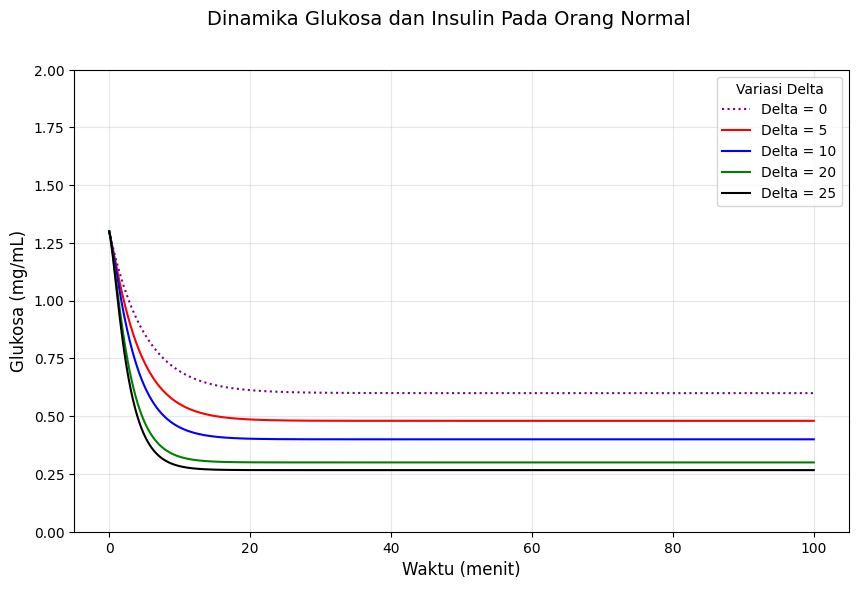

In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi model glukosa-insulin
def f(z, t, alpha, gamma, theta, delta, beta):
    G, I = z
    dGdt = alpha - gamma * G - theta * G * I      # perubahan kadar glukosa
    dIdt = delta * G - beta * I * G               # perubahan kadar insulin
    return np.array([dGdt, dIdt])

# Fungsi Runge-Kutta orde 4 (versi dinamis dengan h)
def runge_kutta_4(f, z0, t, params):
    n = len(t)
    z = np.zeros((n, len(z0)))
    z[0] = z0
    for i in range(1, n):
        h = t[i] - t[i-1]
        k1 = f(z[i-1], t[i-1], *params)
        k2 = f(z[i-1] + 0.5 * h * k1, t[i-1] + 0.5 * h, *params)
        k3 = f(z[i-1] + 0.5 * h * k2, t[i-1] + 0.5 * h, *params)
        k4 = f(z[i-1] + h * k3, t[i-1] + h, *params)
        z[i] = z[i-1] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return z

# Parameter model tetap
alpha = 12
gamma = 0.2
theta = 0.0001
beta = 0.01

# Rentang waktu simulasi
t = np.linspace(0, 100, 3000)

# Variasi delta yang ingin diuji
delta_list = [0, 5, 10 , 20, 25]
colors = ['purple','red', 'blue', 'green', 'black']

fig, ax1 = plt.subplots(figsize=(10, 6))

for i, delta in enumerate(delta_list):
    z0 = [130.0, 5.0]  # Kondisi awal Glukosa (mg/dL) dan Insulin
    params = (alpha, gamma, theta, delta, beta)
    solution = runge_kutta_4(f, z0, t, params)

    glucose = solution[:, 0] / 100  # Ubah glukosa dari mg/dL ke mg/mL

    ax1.plot(t, glucose, color=colors[i],
             label=f'Delta = {delta}',
             linestyle='dotted' if delta == 0 else '-')

ax1.set_xlabel('Waktu (menit)', fontsize=12)
ax1.set_ylabel('Glukosa (mg/mL)', color='black', fontsize=12)
ax1.set_ylim(0, 2)  # Disesuaikan karena sudah dalam mg/mL
ax1.legend(loc="upper right", title="Variasi Delta", fontsize=10)
ax1.grid(alpha=0.3)

fig.suptitle('Dinamika Glukosa dan Insulin Pada Orang Normal', fontsize=14)
plt.show()
